<a href="https://colab.research.google.com/github/vmjs1234/CLUSTERING_ASSIGNMENT/blob/main/g)-clustering_doc_llm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


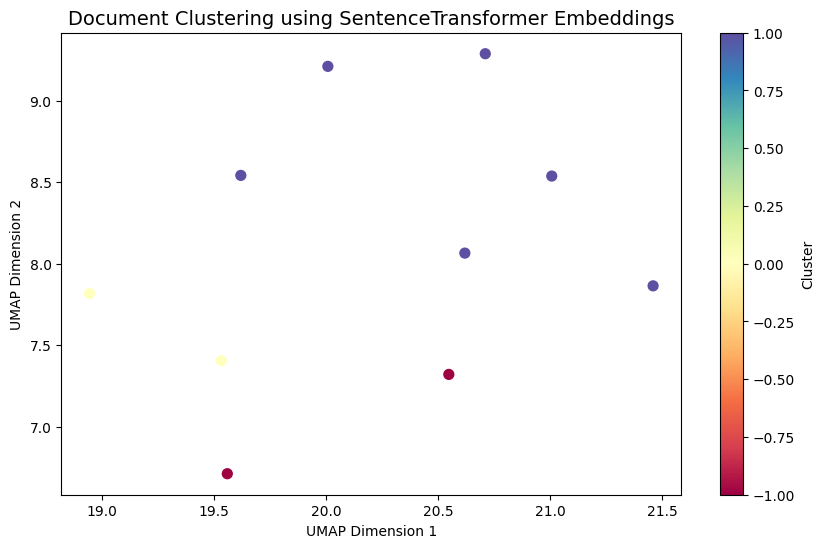

<ipython-input-4-c407aeff4b3d>:57: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  clustered_docs = df.groupby("cluster").apply(lambda x: x["text"].tolist())


,0
cluster,
-1,[Python is a great programming language for da...
0,"[The quick brown fox jumps over the lazy dog.,..."
1,[Artificial intelligence is transforming indus...


In [4]:
# Install required libraries
!pip install openai tiktoken umap-learn hdbscan matplotlib pandas sentence-transformers

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap
import hdbscan
from sentence_transformers import SentenceTransformer

# 1. Load Data
# Example dataset: replace this with your own document collection
documents = [
    "The quick brown fox jumps over the lazy dog.",
    "Python is a great programming language for data science.",
    "Artificial intelligence is transforming industries.",
    "Climate change is a pressing global issue.",
    "Data science involves machine learning and big data.",
    "The stock market fluctuates based on economic indicators.",
    "Dogs are loyal and friendly animals.",
    "Machine learning algorithms power many AI applications.",
    "The global economy is interconnected and complex.",
    "Cats and dogs are popular pets worldwide."
]

# Convert to a DataFrame for easier handling
df = pd.DataFrame(documents, columns=["text"])
df.head()

# 2. Generate Embeddings using SentenceTransformer
# You can use 'all-MiniLM-L6-v2' or another state-of-the-art pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df["text"].tolist(), show_progress_bar=True)

# 3. Dimensionality Reduction using UMAP
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric="cosine", random_state=42)
umap_embeddings = umap_reducer.fit_transform(embeddings)

# 4. Clustering using HDBSCAN
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=2, metric="euclidean", cluster_selection_method="eom")
clusters = hdbscan_clusterer.fit_predict(umap_embeddings)

# Add cluster labels to the DataFrame
df["cluster"] = clusters

# 5. Visualize Clusters
plt.figure(figsize=(10, 6))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=clusters, cmap="Spectral", s=50)
plt.colorbar(label="Cluster")
plt.title("Document Clustering using SentenceTransformer Embeddings", fontsize=14)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

# Display clustered documents
clustered_docs = df.groupby("cluster").apply(lambda x: x["text"].tolist())
clustered_docs


In [5]:


# Display clustered documents with cluster number
for cluster_num, sentences in clustered_docs.items():
  print(f"Cluster {cluster_num}:")
  for sentence in sentences:
    print(f"- {sentence}")
  print()

Cluster -1:
- Python is a great programming language for data science.
- Dogs are loyal and friendly animals.

Cluster 0:
- The quick brown fox jumps over the lazy dog.
- Cats and dogs are popular pets worldwide.

Cluster 1:
- Artificial intelligence is transforming industries.
- Climate change is a pressing global issue.
- Data science involves machine learning and big data.
- The stock market fluctuates based on economic indicators.
- Machine learning algorithms power many AI applications.
- The global economy is interconnected and complex.

